In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm

import scipy as st
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import poisson,skellam


...AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
No_of_matches_16_18_G = 36
No_of_goal_conceded_G = 26
No_of_goal_scored_G = 76

No_of_matches_16_18_S = 33
No_of_goal_conceded_S =23
No_of_goal_scored_S = 54

No_of_Game_G_S = 36
No_of_Goal_conceded_S_G = 72
No_of_Goal_Scored_S_G = 59


In [3]:
model = pm.Model();
with model:
    goal_conceded_germany = pm.Poisson('goal_conceded_germany',(No_of_goal_conceded_G/No_of_matches_16_18_G))
    goal_scored_germany = pm.Poisson('goal_scored_germany',(No_of_goal_scored_G/No_of_matches_16_18_G))
    goal_conceded_Sweden = pm.Poisson('goal_conceded_Sweden',(No_of_goal_conceded_S/No_of_matches_16_18_S))
    goal_scored_Sweden = pm.Poisson('goal_scored_Sweden',(No_of_goal_scored_S/No_of_matches_16_18_S))
    Sweden_win  = pm.Poisson('Sweden_win',(goal_conceded_germany+goal_scored_Sweden)) 
    Germany_win = pm.Poisson('Germany_win',(goal_conceded_Sweden+goal_scored_germany))
    goal_conceded = pm.Poisson('goal_conceded',(goal_conceded_Sweden+goal_conceded_germany))
    goal_scored = pm.Poisson('goal_scored',(goal_scored_Sweden+goal_scored_germany ))
    trace= pm.sample(100000,tune=50000,progressbar=True)

Assigned Metropolis to goal_conceded_germany
Assigned Metropolis to goal_scored_germany
Assigned Metropolis to goal_conceded_Sweden
Assigned Metropolis to goal_scored_Sweden
Assigned Metropolis to Sweden_win
Assigned Metropolis to Germany_win
Assigned Metropolis to goal_conceded
Assigned Metropolis to goal_scored
100%|█████████████████████████████████| 150000/150000 [08:08<00:00, 307.32it/s]


In [20]:
H2Hmodel = pm.Model();

with H2Hmodel:
    goal_scored_by_germany = pm.Poisson('goal_scored_by_germany',No_of_Goal_conceded_S_G/No_of_Game_G_S)
    goal_conceded_by_germany = pm.Poisson('goal_conceded_by_germany',No_of_Goal_Scored_S_G/No_of_Game_G_S)
    germany_win_against_sweden = pm.Poisson('germany_win_against_sweden',
                                            (goal_scored_by_germany))
    Sweden_win_against_Germany = pm.Poisson('Sweden_win_against_Germany',goal_conceded_by_germany)
    H2H_win = pm.Poisson('H2H_win',(germany_win_against_sweden+Sweden_win_against_Germany))
    traceH2H = pm.sample(100000,tune=50000,progressbar=True)
    

Assigned Metropolis to goal_scored_by_germany
Assigned Metropolis to goal_conceded_by_germany
Assigned Metropolis to germany_win_against_sweden
Assigned Metropolis to Sweden_win_against_Germany
Assigned Metropolis to H2H_win
100%|█████████████████████████████████| 150000/150000 [04:44<00:00, 527.58it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F4565C0>,
      dtype=object)

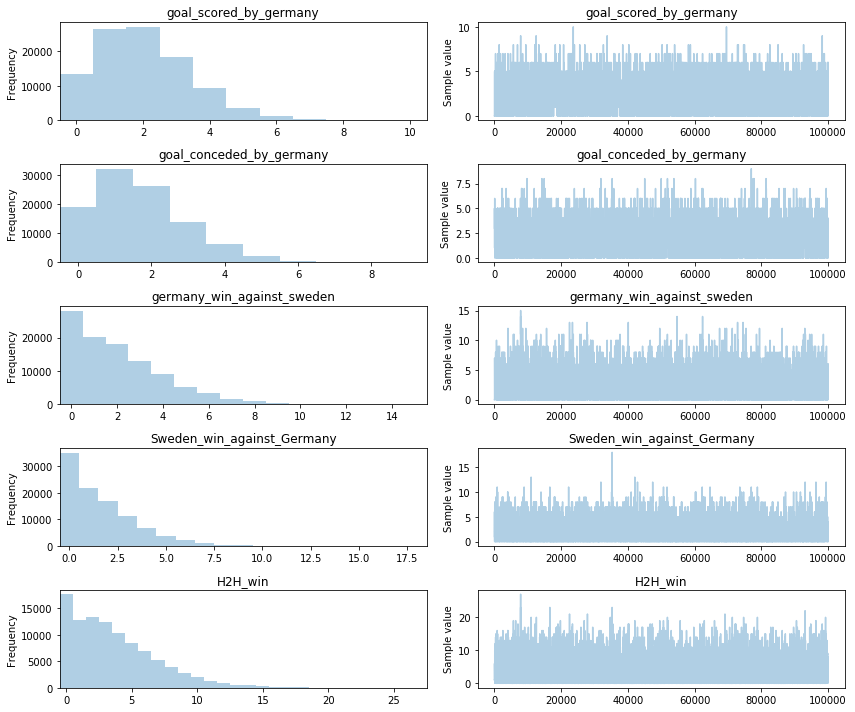

In [21]:
pm.traceplot(traceH2H)

In [26]:
predH2H = pd.DataFrame({
    "GermanyH2H": traceH2H["germany_win_against_sweden"][50000:],
    "SwedenH2H": traceH2H["Sweden_win_against_Germany"][50000:],
   
})


In [28]:
(predH2H.GermanyH2H > predH2H.SwedenH2H).mean()

0.45422

In [29]:
(predH2H.GermanyH2H < predH2H.SwedenH2H).mean()

0.3474

In [30]:
(predH2H.GermanyH2H == predH2H.SwedenH2H).mean()

0.19838

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EED3400>,
      dtype=object)

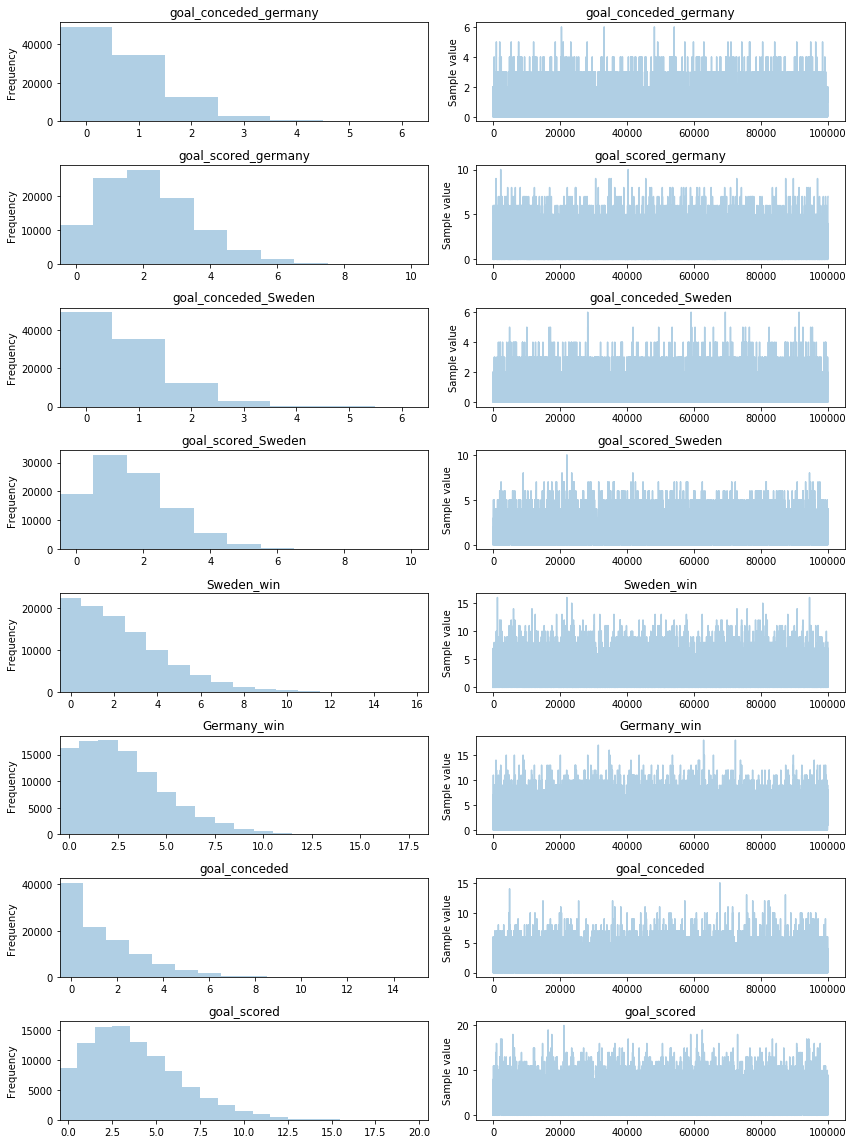

In [4]:
pm.traceplot(trace)

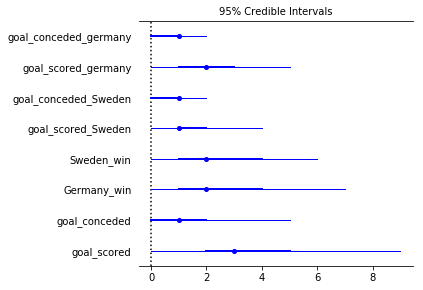

In [5]:
pm.forestplot(trace)

In [6]:
pm.summary(trace)


goal_conceded_germany:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.714            0.845            0.011            [0.000, 2.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          3.000


goal_scored_germany:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.122            1.436            0.020            [0.000, 5.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          1.000          2.000          3.000          5.000


goal_conceded_Sweden:

  Mean             SD               MC Error        

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000355216A0>,
      dtype=object)

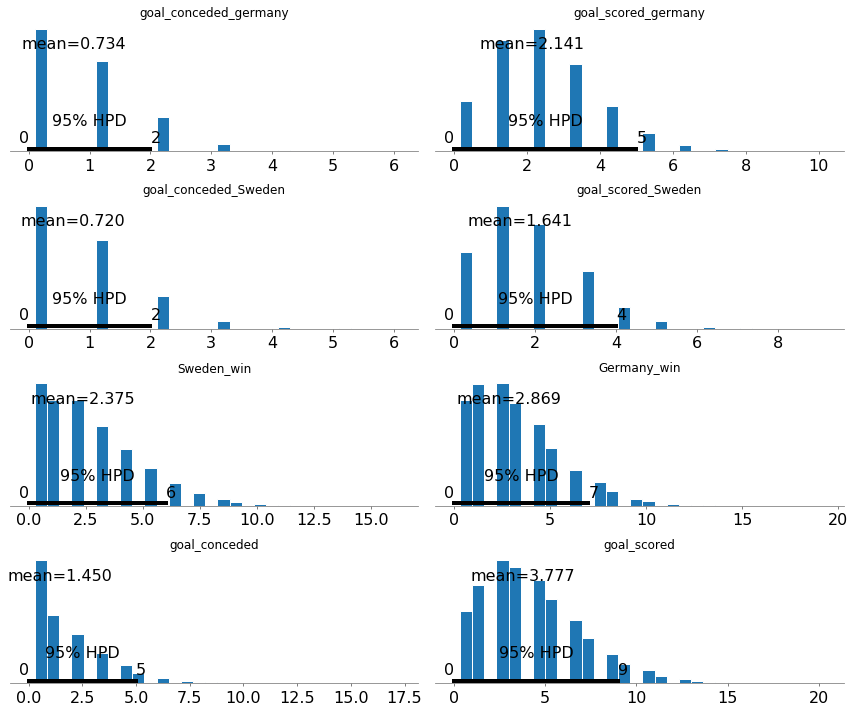

In [54]:
pm.plots.plot_posterior(trace)

In [7]:
pred = pd.DataFrame({
    "Germany": trace["Germany_win"][50000:],
    "Sweden": trace["Sweden_win"][50000:],
})


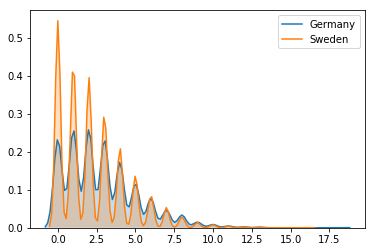

In [8]:
seaborn.kdeplot(pred.Germany, shade=True, label="Germany")
seaborn.kdeplot(pred.Sweden, shade=True, label="Sweden")
plt.show()

In [9]:
(pred.Germany > pred.Sweden).mean()

0.49842

In [10]:
(pred.Sweden > pred.Germany).mean()

0.3563

In [11]:
(pred.Sweden == pred.Germany).mean()

0.14528

In [115]:
1.0 * len(pred[(pred.Sweden == 0) & (pred.Germany==1)])  / len(pred)

0.04076

In [116]:
1.0 * len(pred[(pred.Sweden == 1) & (pred.Germany==1)])  / len(pred)

0.0326

In [125]:
1.0 * len(pred[(pred.Sweden == 0) & (pred.Germany==2)])  / len(pred)

0.04368

In [126]:
1.0 * len(pred[(pred.Sweden == 0) & (pred.Germany==0)])  / len(pred)

0.03716

In [128]:
pred.head(20)

,Germany,Sweden
0,2,0
1,2,0
2,2,0
3,3,0
4,6,0
5,6,0
6,6,0
7,6,0
8,6,0
9,3,0


In [129]:
1.0 * len(pred[(pred.Sweden == 0) & (pred.Germany==3)])  / len(pred)

0.03396